In [125]:
import numpy as np
import pandas as pd
import random as rd
import time

from sklearn import preprocessing

from sklearn.model_selection import KFold
from sklearn import svm

# Loading the data, shuffling and preprocessing it

In [126]:
df = pd.read_csv("energy_efficiency.csv")
df = df.sample(frac=1)
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'Y1'}>],
       [<Axes: title={'center': 'Y2'}>, <Axes: >, <Axes: >]], dtype=object)

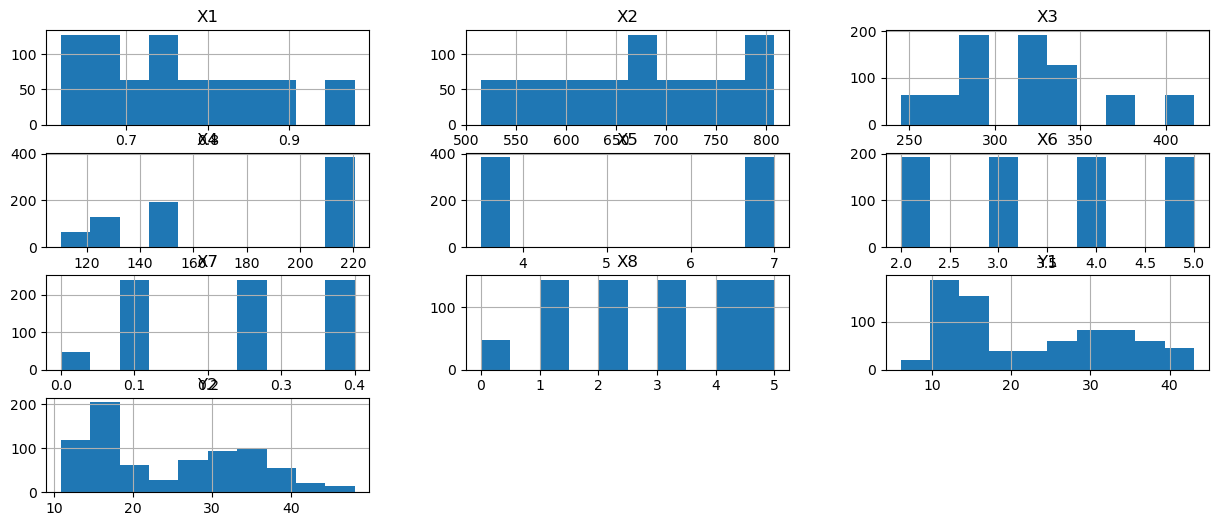

In [127]:
df.hist(figsize=(15, 6))

In [128]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
736,0.79,637.0,343.0,147.0,7.0,2,0.40,5,42.11,38.56
617,0.64,784.0,343.0,220.5,3.5,3,0.40,2,18.88,22.07
19,0.79,637.0,343.0,147.0,7.0,5,0.00,0,28.75,39.44
87,0.66,759.5,318.5,220.5,3.5,5,0.10,1,11.69,13.65
733,0.82,612.5,318.5,147.0,7.0,3,0.40,5,29.50,29.56
...,...,...,...,...,...,...,...,...,...,...
270,0.71,710.5,269.5,220.5,3.5,4,0.10,5,10.67,14.26
459,0.74,686.0,245.0,220.5,3.5,5,0.25,4,12.43,15.35
622,0.62,808.5,367.5,220.5,3.5,4,0.40,2,17.26,16.86
176,0.69,735.0,294.0,220.5,3.5,2,0.10,3,11.22,14.44


In [129]:
# original data
X = df.iloc[:, 0:8]
y = df.iloc[:, -2].values

# X =pd.DataFrame(df, columns=['X1','X2','X3','X4','X5','X6','X7','X8'])
# y = pd.DataFrame(df, columns=['y1']).values
X

,X1,X2,X3,X4,X5,X6,X7,X8
736,0.79,637.0,343.0,147.0,7.0,2,0.40,5
617,0.64,784.0,343.0,220.5,3.5,3,0.40,2
19,0.79,637.0,343.0,147.0,7.0,5,0.00,0
87,0.66,759.5,318.5,220.5,3.5,5,0.10,1
733,0.82,612.5,318.5,147.0,7.0,3,0.40,5
...,...,...,...,...,...,...,...,...
270,0.71,710.5,269.5,220.5,3.5,4,0.10,5
459,0.74,686.0,245.0,220.5,3.5,5,0.25,4
622,0.62,808.5,367.5,220.5,3.5,4,0.40,2
176,0.69,735.0,294.0,220.5,3.5,2,0.10,3


In [130]:
X = pd.get_dummies(X, columns=['X6', 'X8'])
X

,X1,X2,X3,X4,X5,X7,X6_2,X6_3,X6_4,X6_5,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
736,0.79,637.0,343.0,147.0,7.0,0.40,True,False,False,False,False,False,False,False,False,True
617,0.64,784.0,343.0,220.5,3.5,0.40,False,True,False,False,False,False,True,False,False,False
19,0.79,637.0,343.0,147.0,7.0,0.00,False,False,False,True,True,False,False,False,False,False
87,0.66,759.5,318.5,220.5,3.5,0.10,False,False,False,True,False,True,False,False,False,False
733,0.82,612.5,318.5,147.0,7.0,0.40,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.71,710.5,269.5,220.5,3.5,0.10,False,False,True,False,False,False,False,False,False,True
459,0.74,686.0,245.0,220.5,3.5,0.25,False,False,False,True,False,False,False,False,True,False
622,0.62,808.5,367.5,220.5,3.5,0.40,False,False,True,False,False,False,True,False,False,False
176,0.69,735.0,294.0,220.5,3.5,0.10,True,False,False,False,False,False,False,True,False,False


In [131]:
var_prep = preprocessing.MinMaxScaler()
X = var_prep.fit_transform(X)

## SVM_HParam_Opt_Functions


In [132]:
def objective_value(x,y,chromosome,kfold=3):  
    # calculate fitness value for the chromosome of 0s and 1s
    
    # x = c
    lb_x = 10 # lower bound for chromosome x
    ub_x = 1000 # upper bound for chromosome x
    len_x = (len(chromosome)//2) # length of chromosome x
    
    # y = gamma
    lb_y = 0.05 # lower bound for chromosome y
    ub_y = 0.99 # upper bound for chromosome y
    len_y = (len(chromosome)//2) # length of chromosome y
    
    precision_x = (ub_x-lb_x)/((2**len_x)-1) # precision for decoding x
    precision_y = (ub_y-lb_y)/((2**len_y)-1) # precision for decoding y
    
    z = 0 # because we start at 2^0, in the formula
    t = 1 # because we start at the very last element of the vector [index -1]
    x_bit_sum = 0 # initiation (sum(bit)*2^i is 0 at first)
    for i in range(len(chromosome)//2):
        x_bit = chromosome[-t]*(2**z)
        x_bit_sum = x_bit_sum + x_bit
        t = t+1
        z = z+1   
    
    z = 0 # because we start at 2^0, in the formula
    t = 1 + (len(chromosome)//2) # [6,8,3,9] (first 2 are y, so index will be 1+2 = -3)
    y_bit_sum = 0 # initiation (sum(bit)*2^i is 0 at first)
    for j in range(len(chromosome)//2):
        y_bit = chromosome[-t]*(2**z)
        y_bit_sum = y_bit_sum + y_bit
        t = t+1
        z = z+1
    
    # the formulas to decode the chromosome of 0s and 1s to an actual number, the value of x or y
    c_hyperparameter = (x_bit_sum*precision_x)+lb_x
    gamma_hyperparameter = (y_bit_sum*precision_y)+lb_y
    
    
    kf = KFold(n_splits=kfold)
    
    # objective function value for the decoded x and decoded y
    sum_of_error = 0
    for train_index,test_index in kf.split(x):
        x_train,x_test = x[train_index],x[test_index]
        y_train,y_test = y[train_index],y[test_index]
        
        model = svm.SVR(kernel="rbf",
                        C=c_hyperparameter,
                        gamma=gamma_hyperparameter)
        model.fit(x_train,np.ravel(y_train))
        
        accuracy = model.score(x_test,y_test)
        error = 1-(float(accuracy))
        sum_of_error += error
        
    avg_error = sum_of_error/kfold
    
    # the defined function will return 3 values
    return c_hyperparameter,gamma_hyperparameter,avg_error



In [139]:
def find_parents_ts(all_solutions,x,y):
    # finding 2 parents from the pool of solutions
    # using the tournament selection method 
    
    # make an empty array to place the selected parents
    parents = np.empty((0,np.size(all_solutions,1)))
    
    for i in range(2): # do the process twice to get 2 parents
        
        # select 3 random parents from the pool of solutions you have
        
        # get 3 random integers
        indices_list = np.random.choice(len(all_solutions), 3, replace=True)
        
        # get the 3 possible parents for selection
        posb_parent_1 = all_solutions[indices_list[0]]
        posb_parent_2 = all_solutions[indices_list[1]]
        posb_parent_3 = all_solutions[indices_list[2]]
        
        
        # get objective function value (fitness) for each possible parent
        # index no.2 because the objective_value function gives the fitness value at index no.2
        obj_func_parent_1 = objective_value(x=x,y=y,
                                            chromosome=posb_parent_1)[2] # possible parent 1
        obj_func_parent_2 = objective_value(x=x,y=y,
                                            chromosome=posb_parent_2)[2] # possible parent 2
        obj_func_parent_3 = objective_value(x=x,y=y,
                                            chromosome=posb_parent_3)[2] # possible parent 3
        
        
        # find which parent is the best
        min_obj_func = min(obj_func_parent_1,obj_func_parent_2,
                           obj_func_parent_3)
        
        if min_obj_func == obj_func_parent_1:
            selected_parent = posb_parent_1
        elif min_obj_func == obj_func_parent_2:
            selected_parent = posb_parent_2
        else:
            selected_parent = posb_parent_3
        
        # put the selected parent in the empty array we created above
        parents = np.vstack((parents,selected_parent))
        
    parent_1 = parents[0,:] # parent_1, first element in the array
    parent_2 = parents[1,:] # parent_2, second element in the array
    
    return parent_1,parent_2 # the defined function will return 2 arrays


In [134]:
def crossover(parent_1,parent_2,prob_crsvr=1):
    # crossover between the 2 parents to create 2 children
    # functions inputs are parent_1, parent_2, and the probability you would like for crossover
    # default probability of crossover is 1
    
    child_1 = np.empty((0,len(parent_1)))
    child_2 = np.empty((0,len(parent_2)))
    
    
    rand_num_to_crsvr_or_not = np.random.rand() # do we crossover or no???
    
    if rand_num_to_crsvr_or_not < prob_crsvr:
        index_1 = np.random.randint(0,len(parent_1))
        index_2 = np.random.randint(0,len(parent_1))
        
        # get different indices
        # to make sure you will crossover at least one gene
        while index_1 == index_2:
            index_2 = np.random.randint(0,len(parent_1))
        
        index_parent_1 = min(index_1,index_2) 
        index_parent_2 = max(index_1,index_2) 
            
            
        ### FOR PARENT_1 ###
        
        # first_seg_parent_1 -->
        # for parent_1: the genes from the beginning of parent_1 to the
                # beginning of the middle segment of parent_1
        first_seg_parent_1 = parent_1[:index_parent_1]
        
        # middle segment; where the crossover will happen
        # for parent_1: the genes from the index chosen for parent_1 to
                # the index chosen for parent_2
        mid_seg_parent_1 = parent_1[index_parent_1:index_parent_2+1]
        
        # last_seg_parent_1 -->
        # for parent_1: the genes from the end of the middle segment of
                # parent_1 to the last gene of parent_1
        last_seg_parent_1 = parent_1[index_parent_2+1:]
        
        
        ### FOR PARENT_2 ###
        
        # first_seg_parent_2 --> same as parent_1
        first_seg_parent_2 = parent_2[:index_parent_1]
        
        # mid_seg_parent_2 --> same as parent_1
        mid_seg_parent_2 = parent_2[index_parent_1:index_parent_2+1]
        
        # last_seg_parent_2 --> same as parent_1
        last_seg_parent_2 = parent_2[index_parent_2+1:]
        
        
        ### CREATING CHILD_1 ###
        
        # the first segmant from parent_1
        # plus the middle segment from parent_2
        # plus the last segment from parent_1
        child_1 = np.concatenate((first_seg_parent_1,mid_seg_parent_2,
                                  last_seg_parent_1))
        
        
        ### CREATING CHILD_2 ###
        
        # the first segmant from parent_2
        # plus the middle segment from parent_1
        # plus the last segment from parent_2
        child_2 = np.concatenate((first_seg_parent_2,mid_seg_parent_1,
                                  last_seg_parent_2))
    
    
    # when we will not crossover
    # when rand_num_to_crsvr_or_not is NOT less (is greater) than prob_crsvr
    # when prob_crsvr == 1, then rand_num_to_crsvr_or_not will always be less
            # than prob_crsvr, so we will always crossover then
    else:
        child_1 = parent_1
        child_2 = parent_2
    
    return child_1,child_2 # the defined function will return 2 arrays


In [135]:
def mutation(child_1,child_2,prob_mutation=0.2):
    # mutation for the 2 children
    # functions inputs are child_1, child_2, and the probability you would like for mutation
    # default probability of mutation is 0.2
    
    # mutated_child_1
    mutated_child_1 = np.empty((0,len(child_1)))
      
    t = 0 # start at the very first index of child_1
    for i in child_1: # for each gene (index)
        
        rand_num_to_mutate_or_not = np.random.rand() # do we mutate or no???
        
        # if the rand_num_to_mutate_or_not is less that the probability of mutation
                # then we mutate at that given gene (index we are currently at)
        if rand_num_to_mutate_or_not < prob_mutation:
            
            if child_1[t] == 0: # if we mutate, a 0 becomes a 1
                child_1[t] = 1
            
            else:
                child_1[t] = 0  # if we mutate, a 1 becomes a 0
            
            mutated_child_1 = child_1
            
            t = t+1
        
        else:
            mutated_child_1 = child_1
            
            t = t+1
    
       
    # mutated_child_2
    # same process as mutated_child_1
    mutated_child_2 = np.empty((0,len(child_2)))
    
    t = 0
    for i in child_2:
        
        rand_num_to_mutate_or_not = np.random.rand() # prob. to mutate
        
        if rand_num_to_mutate_or_not < prob_mutation:
            
            if child_2[t] == 0:
                child_2[t] = 1
           
            else:
                child_2[t] = 0
            
            mutated_child_2 = child_2
            
            t = t+1
        
        else:
            mutated_child_2 = child_2
            
            t = t+1
    
    return mutated_child_1,mutated_child_2 # the defined function will return 2 arrays



### GA Opration


In [141]:
# hyperparameters (user inputted parameters)
prob_crsvr = 1 # probablity of crossover
prob_mutation = 0.3 # probablity of mutation
population = 20 # population number
generations = 5 # generation number
kfold = 3 

## x and y decision variables encoding
# 12 genes for x and 12 genes for y (arbitrary number)
x_y_string = np.array([0,1,0,0,0,1,0,0,1,0,0,1,
                       0,1,1,1,0,0,1,0,1,1,1,0]) # initial solution

# create an empty array to put initial population
pool_of_solutions = np.empty((0, len(x_y_string)))

# create an empty array  to store a solution from each generation
# for each generation, we want to save the best solution in that generation
# to compare with the convergence of the algorithm
best_of_a_generation = np.empty((0, len(x_y_string) + 1))

# shuffle the elements in the initial solution (vector)
# shuffle n times, wher n is the no. of the desired population
for i in range(population):
    rd.shuffle(x_y_string)  # type: ignore
    pool_of_solutions = np.vstack((pool_of_solutions, x_y_string))


In [142]:
start_time = time.time() # start time (timing purposes)

gen = 1
for i in range(generations):
    # an empty array for saving the new generation
    # at the beginning of each generation, the array chould be empty
    # so that you put all the solutions created in a certain generation
    new_population = np.empty((0, len(x_y_string)))

    # an empty array for saving the new generaton plus its obj func val
    new_population_with_obj_val = np.empty((0, len(x_y_string) + 1))

    # an empty array for saving the best solution (chromosome)
    # for each generation
    sorted_best = np.empty((0, len(x_y_string) + 1))

    print(f"\n--> Gen: #{gen}")

    family = 1 # we start at family no.1 (tracking purposes)

    for j in range(int(population / 2)):
        print(f"\n--> Family: #{family}")

        # selecting 2 parents using tournament selection
        parent_1 = find_parents_ts(pool_of_solutions, X, y)[0]
        parent_2 = find_parents_ts(pool_of_solutions, X, y)[1]

        # crossover the 2 parent to get 2 childern
        child_1 = crossover(parent_1, parent_2, prob_crsvr=prob_crsvr)[0]
        child_2 = crossover(parent_1, parent_2, prob_crsvr=prob_crsvr)[1]

        # mutating the 2 children to get 2 mutated children
        mutated_child_1 = mutation(child_1, child_2, prob_mutation)[0]
        mutated_child_2 = mutation(child_1, child_2, prob_mutation)[1]

        # getting the obj val (fitness value) for the 2 mutated children
        obj_val_mutated_child_1 = objective_value(X, y, chromosome= mutated_child_1, kfold=kfold)[2]
        obj_val_mutated_child_2 = objective_value(X, y, chromosome= mutated_child_2, kfold=kfold)[2]

        # for each mutated child, put its obj val next to it
        mutant_1_with_obj_val = np.hstack((obj_val_mutated_child_1, mutated_child_1))
        mutant_2_with_obj_val = np.hstack((obj_val_mutated_child_2, mutated_child_2))

        # We need to create the new population for the next generation
        # so for each family, we get 2 solutions
        # we keep adding them till we done with all families in one generation
        # by the end of each generation, we should have the same number as the initial population
        # so this keeps on growing and growing
        # when it's a new generation, this array empties and we start the stacking process
        # and so on
        new_population = np.vstack((new_population, mutated_child_1, mutated_child_2))

        # same explanation as above, but we include the obj val for each solution as well 
        new_population_with_obj_val = np.vstack((new_population_with_obj_val, 
                                                 mutant_1_with_obj_val, mutant_2_with_obj_val))
        
        # after getting 2 mutated children (solutions), we get another 2, and so on
        # until we have the same number of the intended population
        # then we go to the next generation and start over
        # since we ended up with 2 solutions, we move on to the next possible solutions
        family += 1


        # we replace the initial (before) population with the new one (current generation)
        # this new pool of solutions becomes the starting population of the next generation
        pool_of_solutions = new_population

        # for each generation
        # we want to find the best solution in that generation
        # so we start them based on index [0], which is the obj val
        sorted_best = np.array(sorted(new_population_with_obj_val, key=lambda x:x[0]))

        
        # since we sorted them from best to worst
        # the best in that generation would be the first solution in the array
        # so index [0] of the "sorted_best" array
        best_of_a_generation = np.vstack((best_of_a_generation, sorted_best[0]))
        
        
        # increase the counter of generations (tracking purposes)
        gen = gen+1       



--> Gen: #1

--> Family: #1

--> Family: #2

--> Family: #3

--> Family: #4

--> Family: #5

--> Family: #6

--> Family: #7

--> Family: #8

--> Family: #9

--> Family: #10

--> Gen: #11

--> Family: #1

--> Family: #2

--> Family: #3

--> Family: #4

--> Family: #5

--> Family: #6

--> Family: #7

--> Family: #8

--> Family: #9

--> Family: #10

--> Gen: #21

--> Family: #1

--> Family: #2

--> Family: #3

--> Family: #4

--> Family: #5

--> Family: #6

--> Family: #7

--> Family: #8

--> Family: #9

--> Family: #10

--> Gen: #31

--> Family: #1

--> Family: #2

--> Family: #3

--> Family: #4

--> Family: #5

--> Family: #6

--> Family: #7

--> Family: #8

--> Family: #9

--> Family: #10

--> Gen: #41

--> Family: #1

--> Family: #2

--> Family: #3

--> Family: #4

--> Family: #5

--> Family: #6

--> Family: #7

--> Family: #8

--> Family: #9

--> Family: #10


In [143]:

end_time = time.time() # end time (timing purposes)


# check line 171
# for our very last generation, we have the last population
# for this array of last population (convergence), there is a best solution
# so we sort them from best to worst
sorted_last_population = np.array(sorted(new_population_with_obj_val, key=lambda x:x[0]))

sorted_best_of_a_generation = np.array(sorted(best_of_a_generation, key=lambda x:x[0]))

sorted_last_population[:,0] = 1-(sorted_last_population[:,0]) # get accuracy instead of error
sorted_best_of_a_generation[:,0] = 1-(sorted_best_of_a_generation[:,0])

# since we sorted them from best to worst
# the best would be the first solution in the array
# so index [0] of the "sorted_last_population" array
best_string_convergence = sorted_last_population[0]

best_string_overall = sorted_best_of_a_generation[0]

print()
print("Execution Time in Minutes:",(end_time - start_time)/60) # exec. time


print()
print()
print("------------------------------")
print()
#print("Execution Time in Seconds:",end_time - start_time) # exec. time
#print()
print("Final Solution (Convergence):",best_string_convergence[1:]) # final solution entire chromosome
print("Encoded C (Convergence):",best_string_convergence[1:14]) # final solution x chromosome
print("Encoded Gamma (Convergence):",best_string_convergence[14:]) # final solution y chromosome
print()
print("Final Solution (Best):",best_string_overall[1:]) # final solution entire chromosome
print("Encoded C (Best):",best_string_overall[1:14]) # final solution x chromosome
print("Encoded Gamma (Best):",best_string_overall[14:]) # final solution y chromosome

# to decode the x and y chromosomes to their real values
final_solution_convergence = objective_value(x=X,y=y,
                                             chromosome=best_string_convergence[1:], kfold=kfold)

final_solution_overall = objective_value(x=X,y=y, 
                                         chromosome=best_string_overall[1:], kfold=kfold)

# the "svm_hp_opt.objective_value" function returns 3 things -->
# [0] is the x value
# [1] is the y value
# [2] is the obj val for the chromosome (avg. error)

print()
print("Decoded C (Convergence):",round(final_solution_convergence[0],5)) # real value of x
print("Decoded Gamma (Convergence):",round(final_solution_convergence[1],5)) # real value of y
print("Obj Value - Convergence:",round(1-(final_solution_convergence[2]),5)) # obj val of final chromosome
print()
print("Decoded C (Best):",round(final_solution_overall[0],5)) # real value of x
print("Decoded Gamma (Best):",round(final_solution_overall[1],5)) # real value of y
print("Obj Value - Best in Generations:",round(1-(final_solution_overall[2]),5)) # obj val of final chromosome
print()
print("------------------------------")



Execution Time in Minutes: 78.6831785996755


------------------------------

Final Solution (Convergence): [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
Encoded C (Convergence): [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
Encoded Gamma (Convergence): [0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]

Final Solution (Best): [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
Encoded C (Best): [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
Encoded Gamma (Best): [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]

Decoded C (Convergence): 608.83516
Decoded Gamma (Convergence): 0.12483
Obj Value - Convergence: 0.93601

Decoded C (Best): 992.50549
Decoded Gamma (Best): 0.08122
Obj Value - Best in Generations: 0.93802

------------------------------
